# Datapaper plots

1. field_location.png Modis moa Inset map, ant in corner, icestreams scale, square of common border, include flow route,
2. geophysics_overview.png Map of all data presented
3. historic_channel.png Historic landsat images
4. thickness_surfacecolour.png Profile depth
5. 4square_channel.png Four square = imagery, surface, bed&surface, change
6. 3D view of channel
7. radarlines 
8. channel_meander.png meander
11. ApRES include stress
9. Icesat1/REMA
10. Icesat2


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import time
import datetime as dt
import pandas as pd
import geopandas as gpd
import scipy as sp
from scipy import signal
# from tqdm.notebook import tqdm
import rasterio as rio
from shapely.geometry import Point, LineString, Polygon, MultiPoint, box
import fiona
from shapely.ops import nearest_points
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

In [17]:
KIS1pt = (-155.2605, -82.7838)
whillpt = (-163.5,-84.38)

In [12]:
gpd.GeoDataFrame({"ApRES2020":geometryds},geometry=geometryds,crs=4326).to_crs(3031)

ApRES2020         geometry
0  POINT (-84.38 -163.5)  POINT (inf inf)

In [18]:
sterio = []
for p in [KIS1pt,whillpt]:
    geometryds = [Point(p)]
    ds =gpd.GeoDataFrame({"ApRES2020":geometryds},geometry=geometryds,crs=4326)
    print(ds.to_crs(3031).copy())
    del ds

                    ApRES2020                         geometry
0  POINT (-155.2605 -82.7838)  POINT (-328539.809 -713001.579)
               ApRES2020                         geometry
0  POINT (-163.5 -84.38)  POINT (-173560.919 -585931.843)


In [7]:
ds

ApRES2020                  geometry
0  POINT (-84.38 -163.5)  POINT (-84.380 -163.500)

In [2]:
xmin, xmax, ymin, ymax = -382700/1000, -374781.9/1000, -734075.1/1000, -721770.2/1000

a = 10000/1000

xmin= xmin- a

xmax=xmax+ a

ymin=ymin- a

ymax = ymax+ a

In [3]:
bbox = box(xmin*1000,  xmax*1000, ymin*1000, ymax*1000)

In [4]:
xmin

-392.7

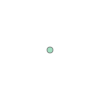

In [5]:
centre_point = Point(np.mean([xmin,xmax]),np.mean([ymin,ymax]))
centre_point

In [6]:
centre_point_gpd = gpd.GeoDataFrame({'p':[centre_point]},geometry=[centre_point],crs=3031)

In [7]:
centre_point_gpd.to_crs(4326,inplace=True)
centre_point_gpd.geometry

0    POINT (-152.51187 -89.99245)
Name: geometry, dtype: geometry

In [8]:
path85 = '/Volumes/arc_02/whitefar/DATA/LANDSAT/LT05_L1GS_226122_19850124_20200918_02_T2/LT05_L1GS_226122_19850124_20200918_02_T2_B1.TIF'

with rio.open(path85) as image:
    im_85 = image.read(1)
    extent_85 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

In [9]:
path89 = '/Volumes/arc_02/whitefar/DATA/LANDSAT/LT04_L1GS_233121_19891128_20200916_02_T2/LT04_L1GS_233121_19891128_20200916_02_T2_B3.TIF'

with rio.open(path89) as image:
    im_89 = image.read(1)
    extent_89 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

In [10]:
path02 = '/Volumes/arc_02/whitefar/DATA/LANDSAT/LE07_L1GT_227122_20021224_20200916_02_T2/LE07_L1GT_227122_20021224_20200916_02_T2_B8.TIF'

with rio.open(path02) as image:
    im_02 = image.read(1)
    extent_02 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

In [11]:
path06 = '/Volumes/arc_02/whitefar/DATA/LANDSAT/LE07_L2SR_232122_20061206_20200913_02_T2/LE07_L2SR_232122_20061206_20200913_02_T2_SR_B1.TIF'

with rio.open(path06) as image:
    im_06 = image.read(1)
    extent_06 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

In [12]:
path20 = '/Volumes/arc_02/whitefar/DATA/LANDSAT/LC08_L2SR_231122_20201213_20201219_02_T2/LC08_L2SR_231122_20201213_20201219_02_T2_SR_B3.TIF'

with rio.open(path20) as image:
    im_20 = image.read(1)
    extent_20 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

In [13]:
#groundingline
groundingline_path = glob.glob(f"/Volumes/arc_02/REMOTE_SENSING/Quantarctica3/Miscellaneous/ScrippsGroundingLine/*.shp")[0]
groundingline =  gpd.read_file(groundingline_path)
# groundingline_path

groundingline = groundingline[groundingline.geometry.intersects(bbox)].copy()

coast = groundingline.geometry.iloc[0].exterior.coords[:]

gl = np.array([[x,y] for x,y in coast ])

gl = gl[(gl[:,0]< xmax*1000) & (gl[:,0]> xmin*1000) & (gl[:,1] > ymin*1000) & (gl[:,1] <  ymax*1000)].copy()

## 3. historic_channel.png 
Historic landsat images

In [14]:
yticks = ((np.linspace(-740000,-715000,4)//500)*500/1000).astype(int)
xticks = ((np.linspace(-390000,-365000,4)//500)*500/1000).astype(int)


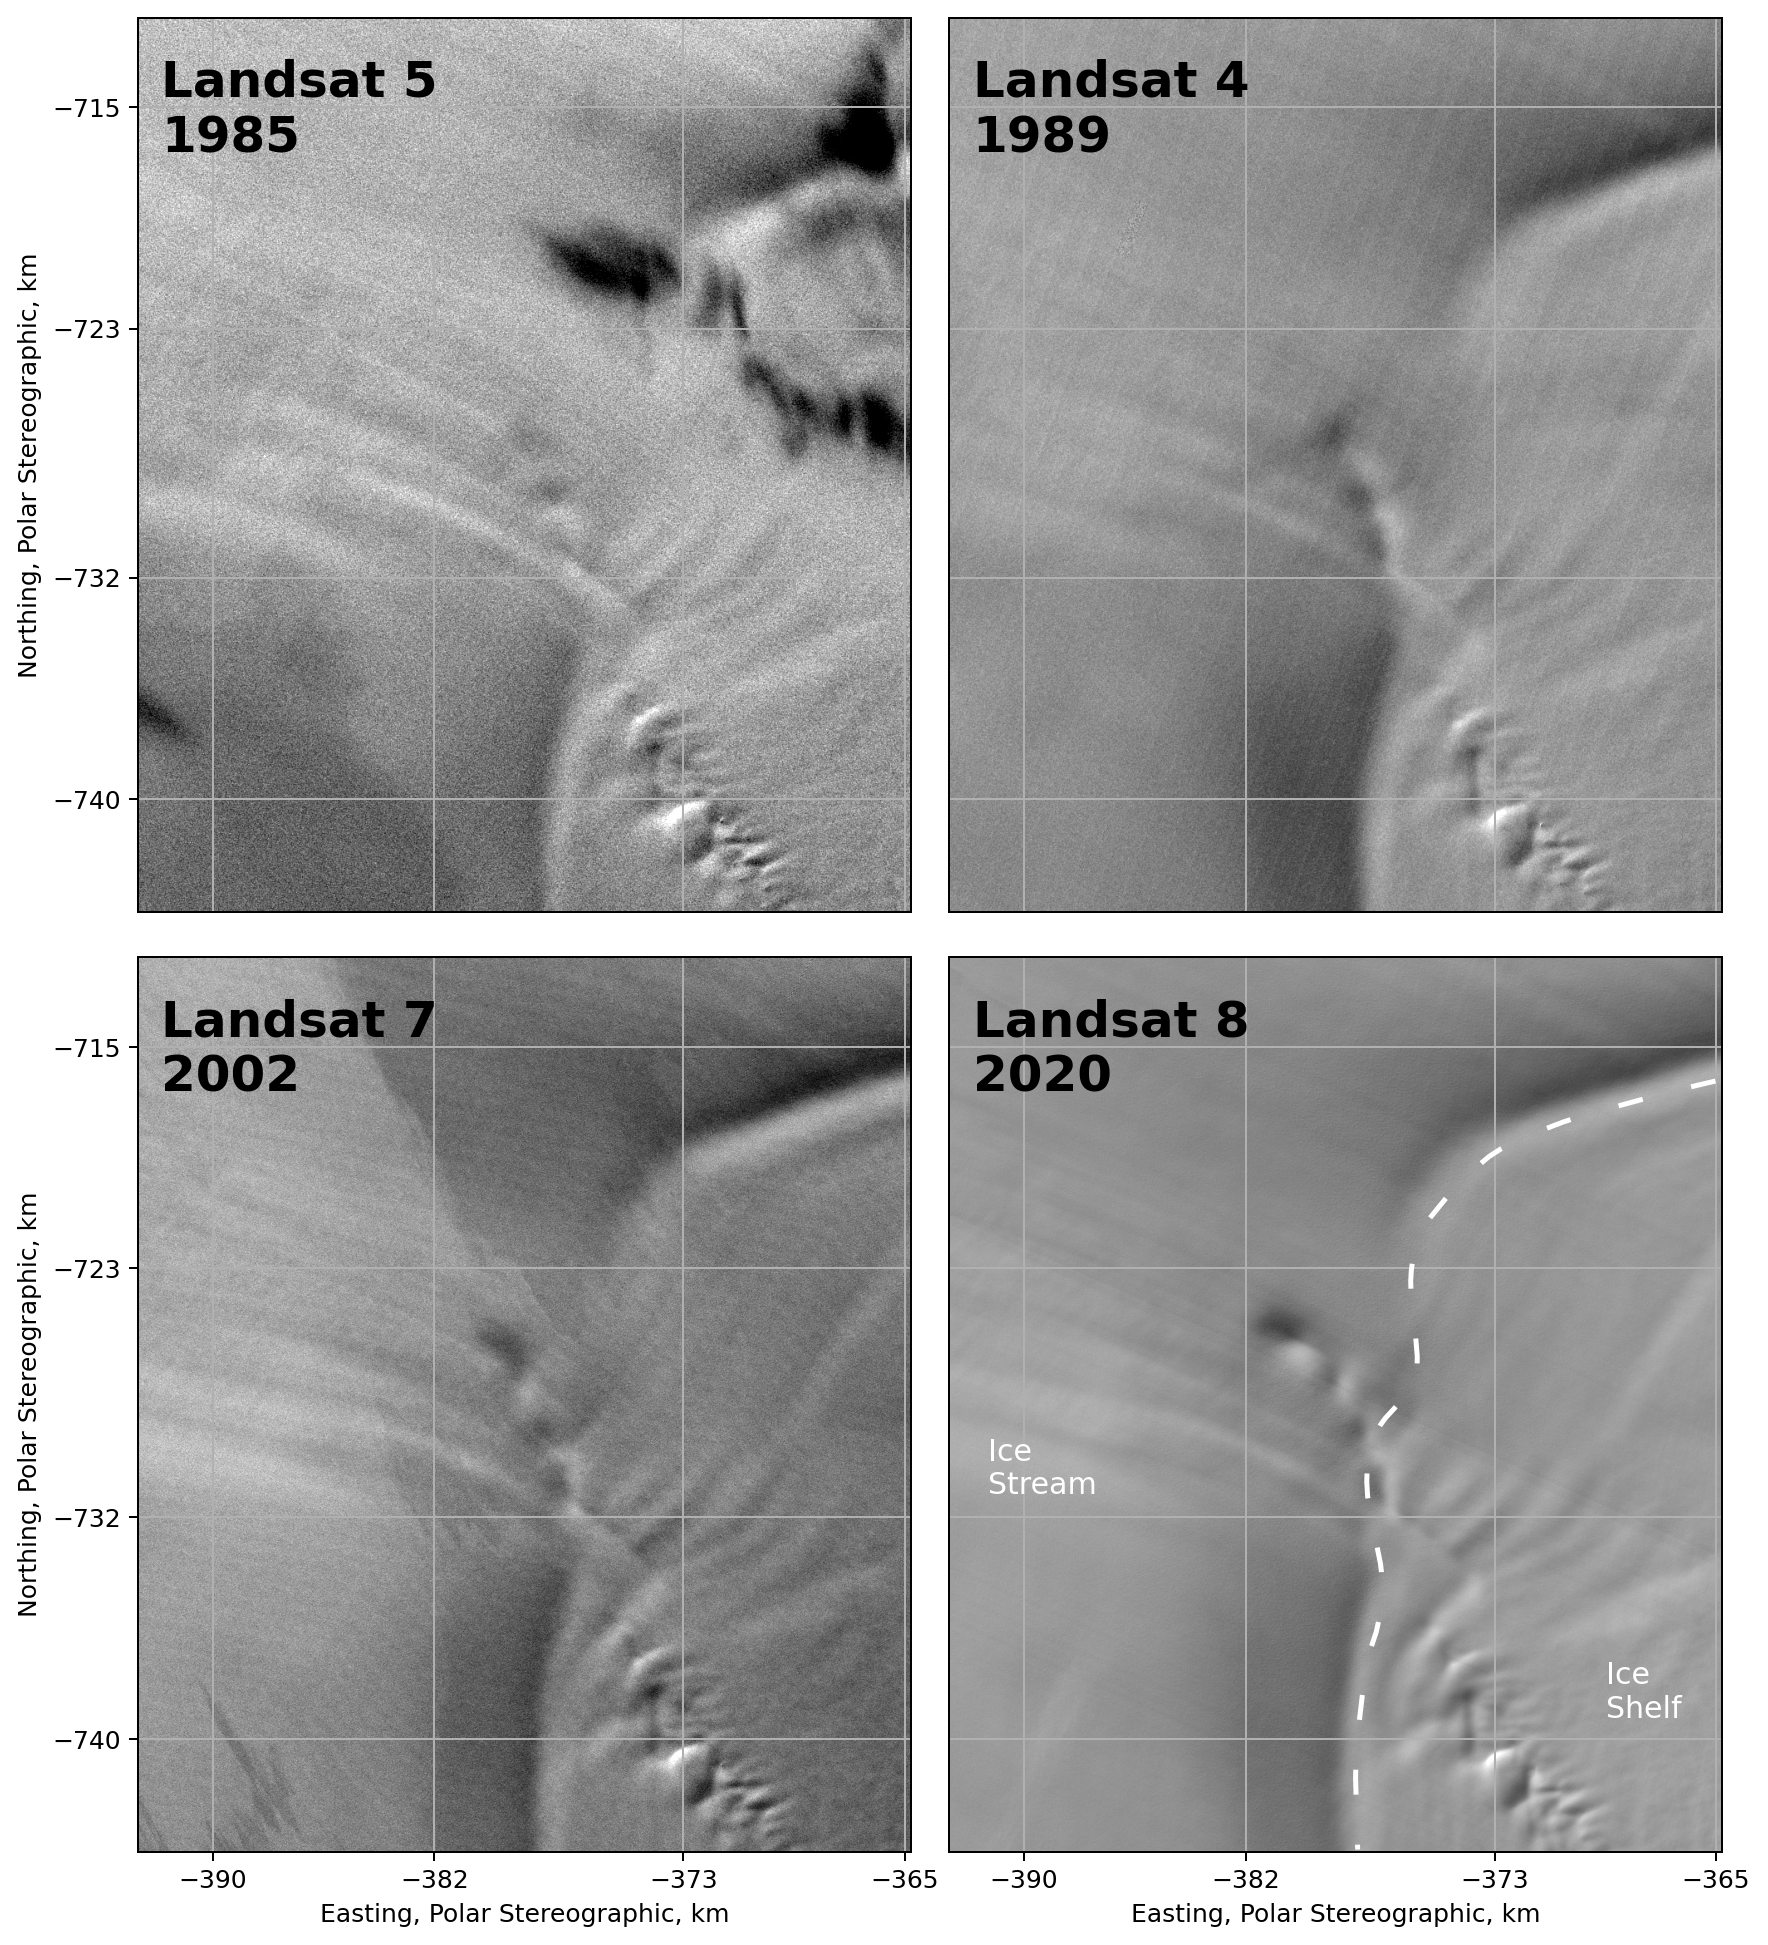

In [16]:
fig, ax = plt.subplots(2,2, dpi=180,figsize=(11,13.5))
plt.subplots_adjust(wspace=0.05, hspace=0.05, right=0.9, left=0.1)

aa = ax[1,1].imshow(im_20,extent=np.array(extent_20)/1000, vmin=38000,vmax=43000, cmap='gist_gray')
ax[1,1].plot(gl[:,0]/1000,gl[:,1]/1000,'w',linestyle = (0,(5,10)),label='grounding line',linewidth=2)
ax[1,1].grid()
ax[1,1].set_xlim([xmin,xmax])
ax[1,1].set_ylim([ymin,ymax])
ax[1,1].tick_params(left=False, labelleft=False)
ax[1,1].set_yticks(yticks)
ax[1,1].set_xlabel('Easting, Polar Stereographic, km')
ax[1,1].set_xticks(xticks)

ax[1,1].text(0.05,0.4,'Ice\nStream',color='w',size=12,transform=ax[1,1].transAxes)
ax[1,1].text(0.85,0.15,'Ice\nShelf',color='w',size=12,transform=ax[1,1].transAxes)
# fig.colorbar(aa,ax=ax[1,1])


a1 = ax[1,0].imshow(im_02,extent=np.array(extent_02)/1000,vmin=115,vmax=130, cmap='gist_gray')
ax[1,0].grid()
ax[1,0].set_xlim([xmin,xmax])
ax[1,0].set_ylim([ymin,ymax])
ax[1,0].set_ylabel('Northing, Polar Stereographic, km')
ax[1,0].set_yticks(yticks)
ax[1,0].set_xticks(xticks)
ax[1,0].set_xlabel('Easting, Polar Stereographic, km')
# ax[1,0].tick_params(labelrotation=45)

# fig.colorbar(a1,ax=ax[1,0])

a2 = ax[0,1].imshow(im_89,extent=np.array(extent_89)/1000,vmin=115,vmax=135, cmap='gist_gray')
ax[0,1].grid()
ax[0,1].set_xlim([xmin,xmax])
ax[0,1].set_ylim([ymin,ymax])
ax[0,1].tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
ax[0,1].set_yticks(yticks)
ax[0,1].set_xticks(xticks)

# fig.colorbar(a2,ax=ax[1,0])

a3 = ax[0,0].imshow(im_85,extent=np.array(extent_85)/1000,vmin=175,vmax=190, cmap='gist_gray')
ax[0,0].grid()
ax[0,0].set_xlim([xmin,xmax])
ax[0,0].set_ylim([ymin,ymax])
ax[0,0].tick_params(bottom=False, labelbottom=False)
ax[0,0].set_xticks(xticks)
ax[0,0].set_yticks(yticks)
ax[0,0].set_ylabel('Northing, Polar Stereographic, km')



# ax[0,0].set_yticks(yticks)


# fig.colorbar(a3,ax=ax[1,1])

axs = ax.flat

titles = ['Landsat 5\n1985','Landsat 4\n1989','Landsat 7\n2002','Landsat 8\n2020']

for n, a in enumerate(axs):
#     a.text(0, 1.05, titles[n], transform=a.transAxes, 
     a.text(0.03, 0.85, titles[n], transform=a.transAxes, 
            size=20, weight='bold')


    
# plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/historic_channel.png')
plt.show()

In [27]:
xmin, xmax, ymin, ymax = -382700/1000, -374781.9/1000, -734075.1/1000, -721770.2/1000
bbox = box(xmin*1000,  xmax*1000, ymin*1000, ymax*1000)

In [28]:
#load REMA
nid1 = 159202
nid2 = 131226
df = gpd.read_file('/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/REMA_Strip_Index_Rel1/REMA_Strip_Index_Rel1.shp')
path = f"/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_{nid1}-{nid2}_diff.tif"
# /Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_159202-131226_diff.tif
f = df.loc[nid1].acquisitio
t =df.loc[nid2].acquisitio
duration = (pd.to_datetime(t)-pd.to_datetime(f)).days/365.25

with rio.open('/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/SETSM_WV01_20161109_1020010058134D00_10200100576C9100_seg1_2m_v1.0_dem.tif') as image:
    extent_REMA = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
    im_REMA = image.read(1)

x = np.linspace(extent_REMA[0],extent_REMA[1],im_REMA.shape[1]).astype('int')
y = np.linspace(extent_REMA[3],extent_REMA[2],im_REMA.shape[0]).astype('int')

x_i = np.argwhere((x>xmin*1000) & (x< xmax*1000)).flatten()[0]
x_j = np.argwhere((x>xmin*1000) & (x< xmax*1000)).flatten()[-1]
y_i = np.argwhere((y>ymin*1000) & (y< ymax*1000)).flatten()[0]
y_j = np.argwhere((y>ymin*1000) & (y< ymax*1000)).flatten()[-1]

x_c = np.linspace(extent_REMA[0],extent_REMA[1],im_REMA.shape[1]).astype('int')[x_i:x_j]
y_c = np.linspace(extent_REMA[3],extent_REMA[2],im_REMA.shape[0]).astype('int')[y_i:y_j]

xv_REMA, yv_REMA = np.meshgrid(x_c, y_c)

im_REMA_d = im_REMA[y_i:y_j,x_i:x_j]
im_REMA_d[im_REMA_d==-99.99] = np.nan
im_REMA_c = im_REMA_d
    

In [29]:
# bbox = box(xmin, xmax, ymin, ymax )
#groundingline
groundingline_path = glob.glob(f"/Volumes/arc_02/REMOTE_SENSING/Quantarctica3/Miscellaneous/ScrippsGroundingLine/*.shp")[0]
groundingline =  gpd.read_file(groundingline_path)
# groundingline_path

groundingline = groundingline[groundingline.geometry.intersects(bbox)].copy()

coast = groundingline.geometry.iloc[0].exterior.coords[:]

gl = np.array([[x,y] for x,y in coast ])

gl = gl[(gl[:,0]< xmax) & (gl[:,0]> xmin) & (gl[:,1] > ymin) & (gl[:,1] <  ymax)].copy()

In [30]:
#smooth REMA dem for contours
im_REMA_c_smoo = sp.ndimage.gaussian_filter(im_REMA_c, sigma=20, order=0)
del im_REMA_d,im_REMA_c

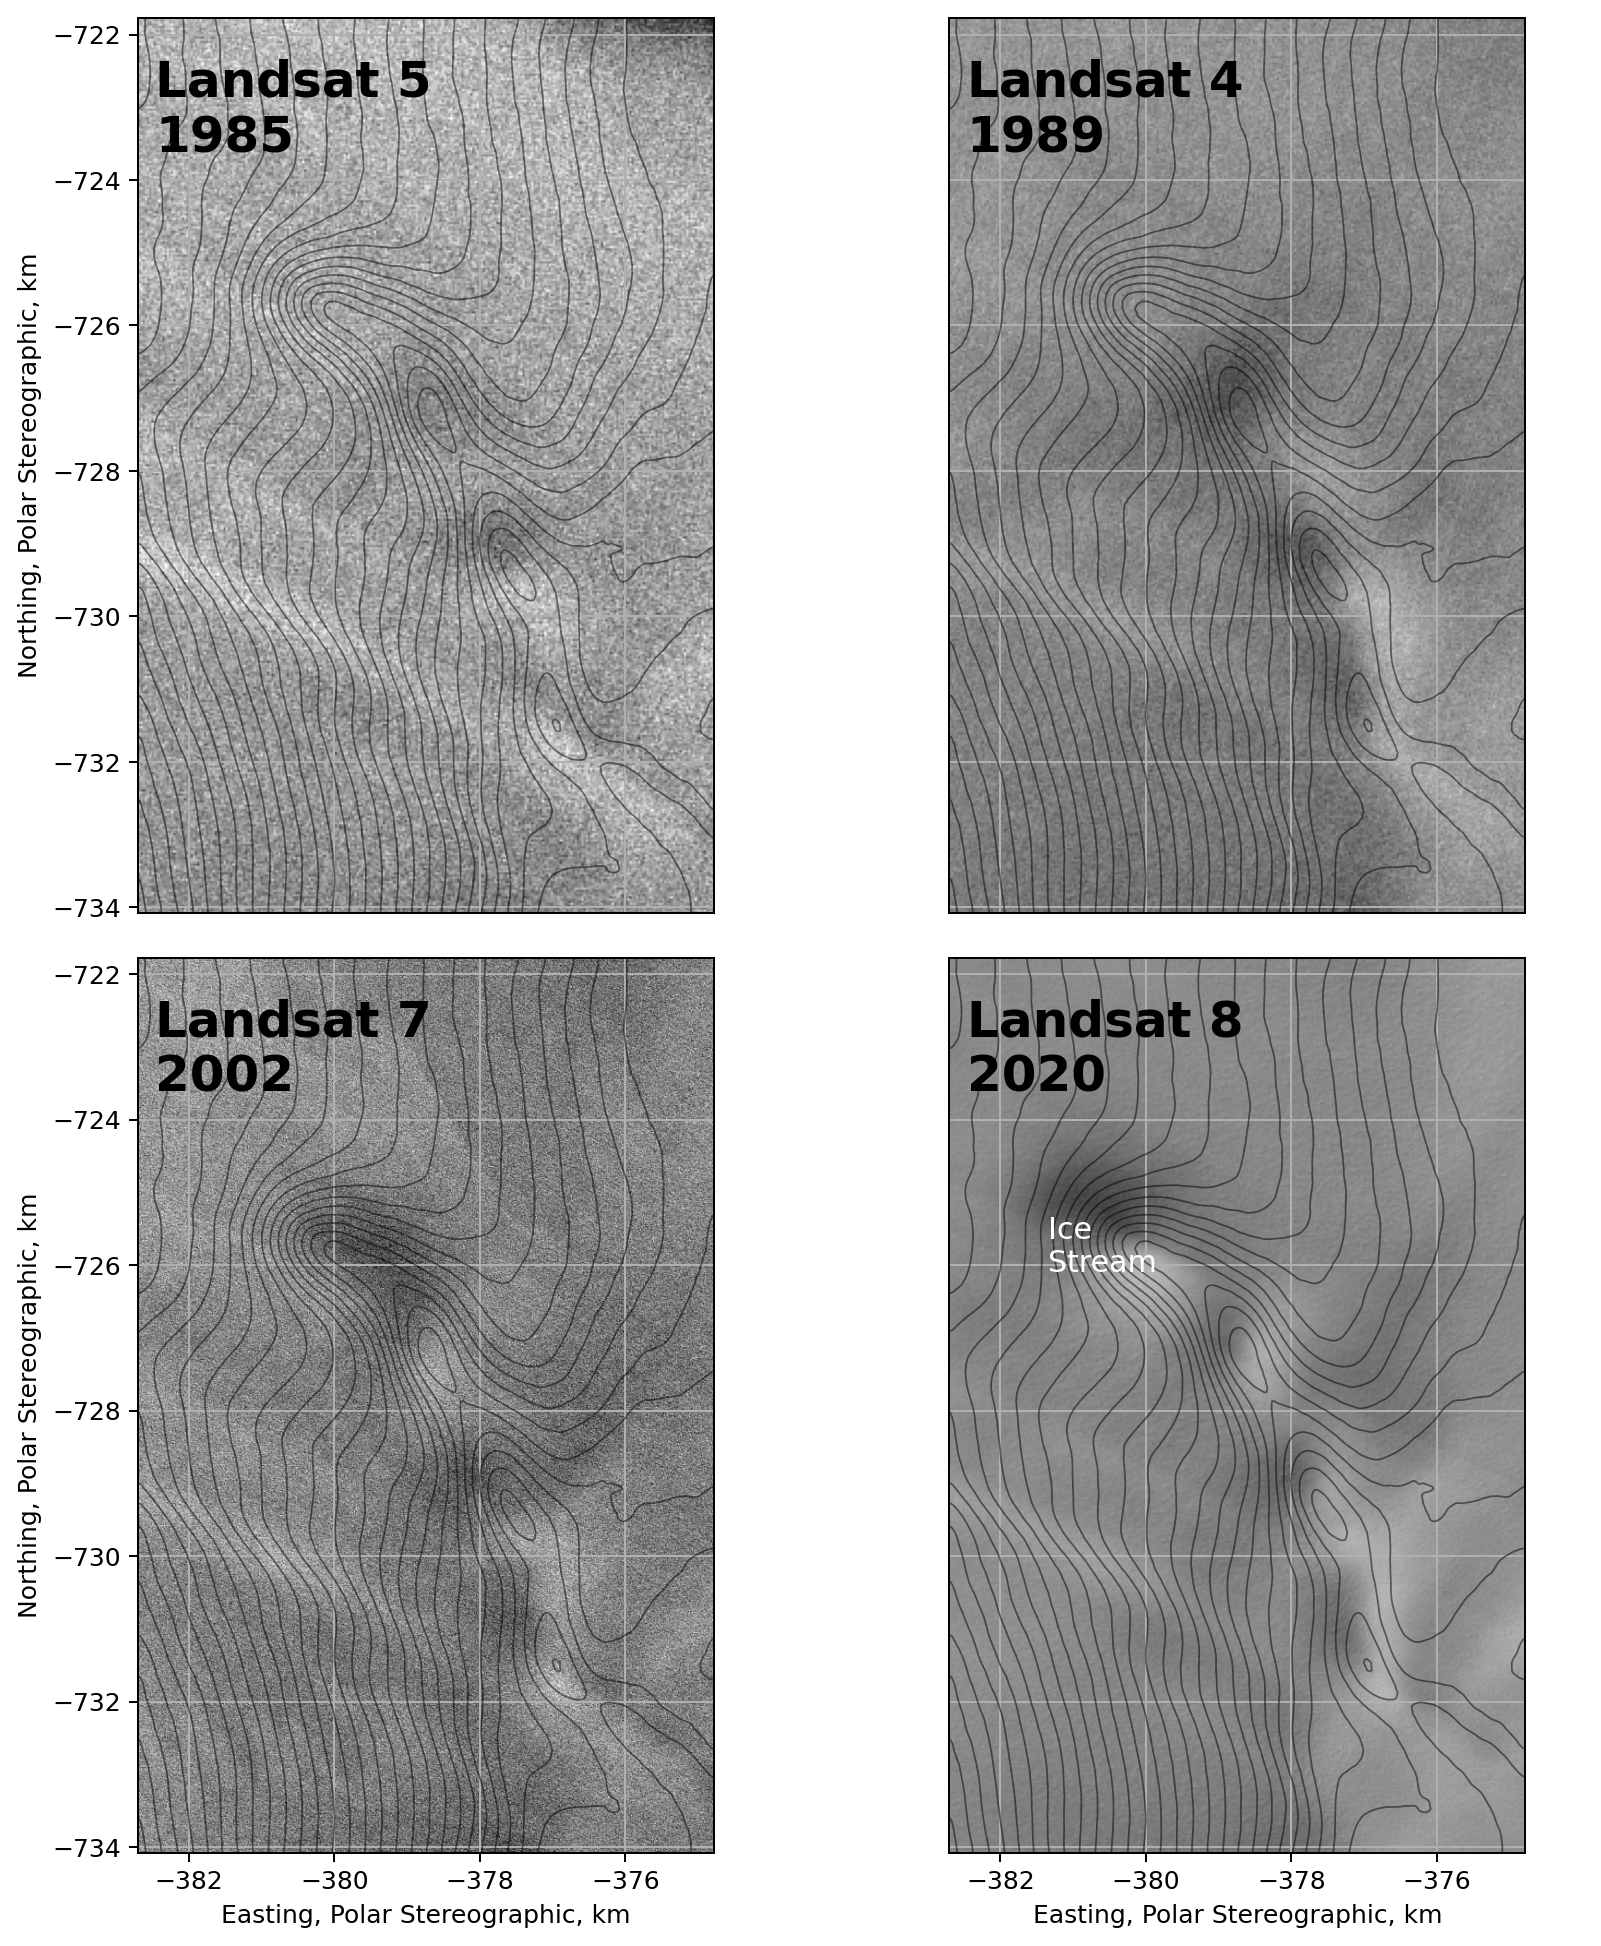

In [32]:
fig, ax = plt.subplots(2,2, dpi=180,figsize=(11,13.5))
plt.subplots_adjust(wspace=0.05, hspace=0.05, right=0.9, left=0.1)

aa = ax[1,1].imshow(im_20,extent=np.array(extent_20)/1000, vmin=38000,vmax=43000, cmap='gist_gray')
ax[1,1].plot(gl[:,0]/1000,gl[:,1]/1000,'w',linestyle = (0,(5,10)),label='grounding line',linewidth=2)
ax[1,1].grid()
ax[1,1].set_xlim([xmin,xmax])
ax[1,1].set_ylim([ymin,ymax])
ax[1,1].tick_params(left=False, labelleft=False)
# ax[1,1].set_yticks(yticks)
ax[1,1].set_xlabel('Easting, Polar Stereographic, km')
# ax[1,1].set_xticks(xticks)

ax[1,1].text(0.05,0.4,'Ice\nStream',color='w',size=12,transform=a.transAxes)
ax[1,1].text(0.85,0.15,'Ice\nShelf',color='w',size=12,transform=a.transAxes)
ax[1,1].contour(xv_REMA[::50]/1000,yv_REMA[::50]/1000,im_REMA_c_smoo[::50],
                      30,vmin=15,vmax=90, 
#                   cmap='BrBG',
                  colors='black',
                  alpha=0.8,linewidths=0.7)
# fig.colorbar(aa,ax=ax[1,1])


a1 = ax[1,0].imshow(im_02,extent=np.array(extent_02)/1000,vmin=115,vmax=130, cmap='gist_gray')
ax[1,0].grid()
ax[1,0].set_xlim([xmin,xmax])
ax[1,0].set_ylim([ymin,ymax])
ax[1,0].set_ylabel('Northing, Polar Stereographic, km')
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_xticks(xticks)
ax[1,0].set_xlabel('Easting, Polar Stereographic, km')
ax[1,0].contour(xv_REMA[::50]/1000,yv_REMA[::50]/1000,im_REMA_c_smoo[::50],
                      30,vmin=15,vmax=90, 
#                   cmap='BrBG',
                  colors='black',
                  alpha=0.8,linewidths=0.7)
# ax[1,0].tick_params(labelrotation=45)

# fig.colorbar(a1,ax=ax[1,0])

a2 = ax[0,1].imshow(im_89,extent=np.array(extent_89)/1000,vmin=115,vmax=135, cmap='gist_gray')
ax[0,1].grid()
ax[0,1].set_xlim([xmin,xmax])
ax[0,1].set_ylim([ymin,ymax])
ax[0,1].tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
# ax[0,1].set_yticks(yticks)
# ax[0,1].set_xticks(xticks)
ax[0,1].contour(xv_REMA[::50]/1000,yv_REMA[::50]/1000,im_REMA_c_smoo[::50],
                      30,vmin=15,vmax=90, 
#                   cmap='BrBG',
                  colors='black',
                  alpha=0.8,linewidths=0.7)

# fig.colorbar(a2,ax=ax[1,0])

a3 = ax[0,0].imshow(im_85,extent=np.array(extent_85)/1000,vmin=175,vmax=190, cmap='gist_gray')
ax[0,0].grid()
ax[0,0].set_xlim([xmin,xmax])
ax[0,0].set_ylim([ymin,ymax])
ax[0,0].tick_params(bottom=False, labelbottom=False)
# ax[0,0].set_xticks(xticks)
# ax[0,0].set_yticks(yticks)
ax[0,0].set_ylabel('Northing, Polar Stereographic, km')
ax[0,0].contour(xv_REMA[::50]/1000,yv_REMA[::50]/1000,im_REMA_c_smoo[::50],
                      30,vmin=15,vmax=90, 
#                   cmap='BrBG',
                  colors='black',
                  alpha=0.8,linewidths=0.7)


# ax[0,0].set_yticks(yticks)


# fig.colorbar(a3,ax=ax[1,1])

axs = ax.flat

titles = ['Landsat 5\n1985','Landsat 4\n1989','Landsat 7\n2002','Landsat 8\n2020']

for n, a in enumerate(axs):
#     a.text(0, 1.05, titles[n], transform=a.transAxes, 
     a.text(0.03, 0.85, titles[n], transform=a.transAxes, 
            size=20, weight='bold')


    

plt.show()

(0,)

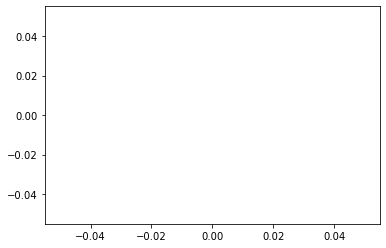

In [26]:
plt.plot(gl[:,0]/1000,gl[:,1]/1000,'w-',label='grounding line',linewidth=2)
gl[:,0].shape

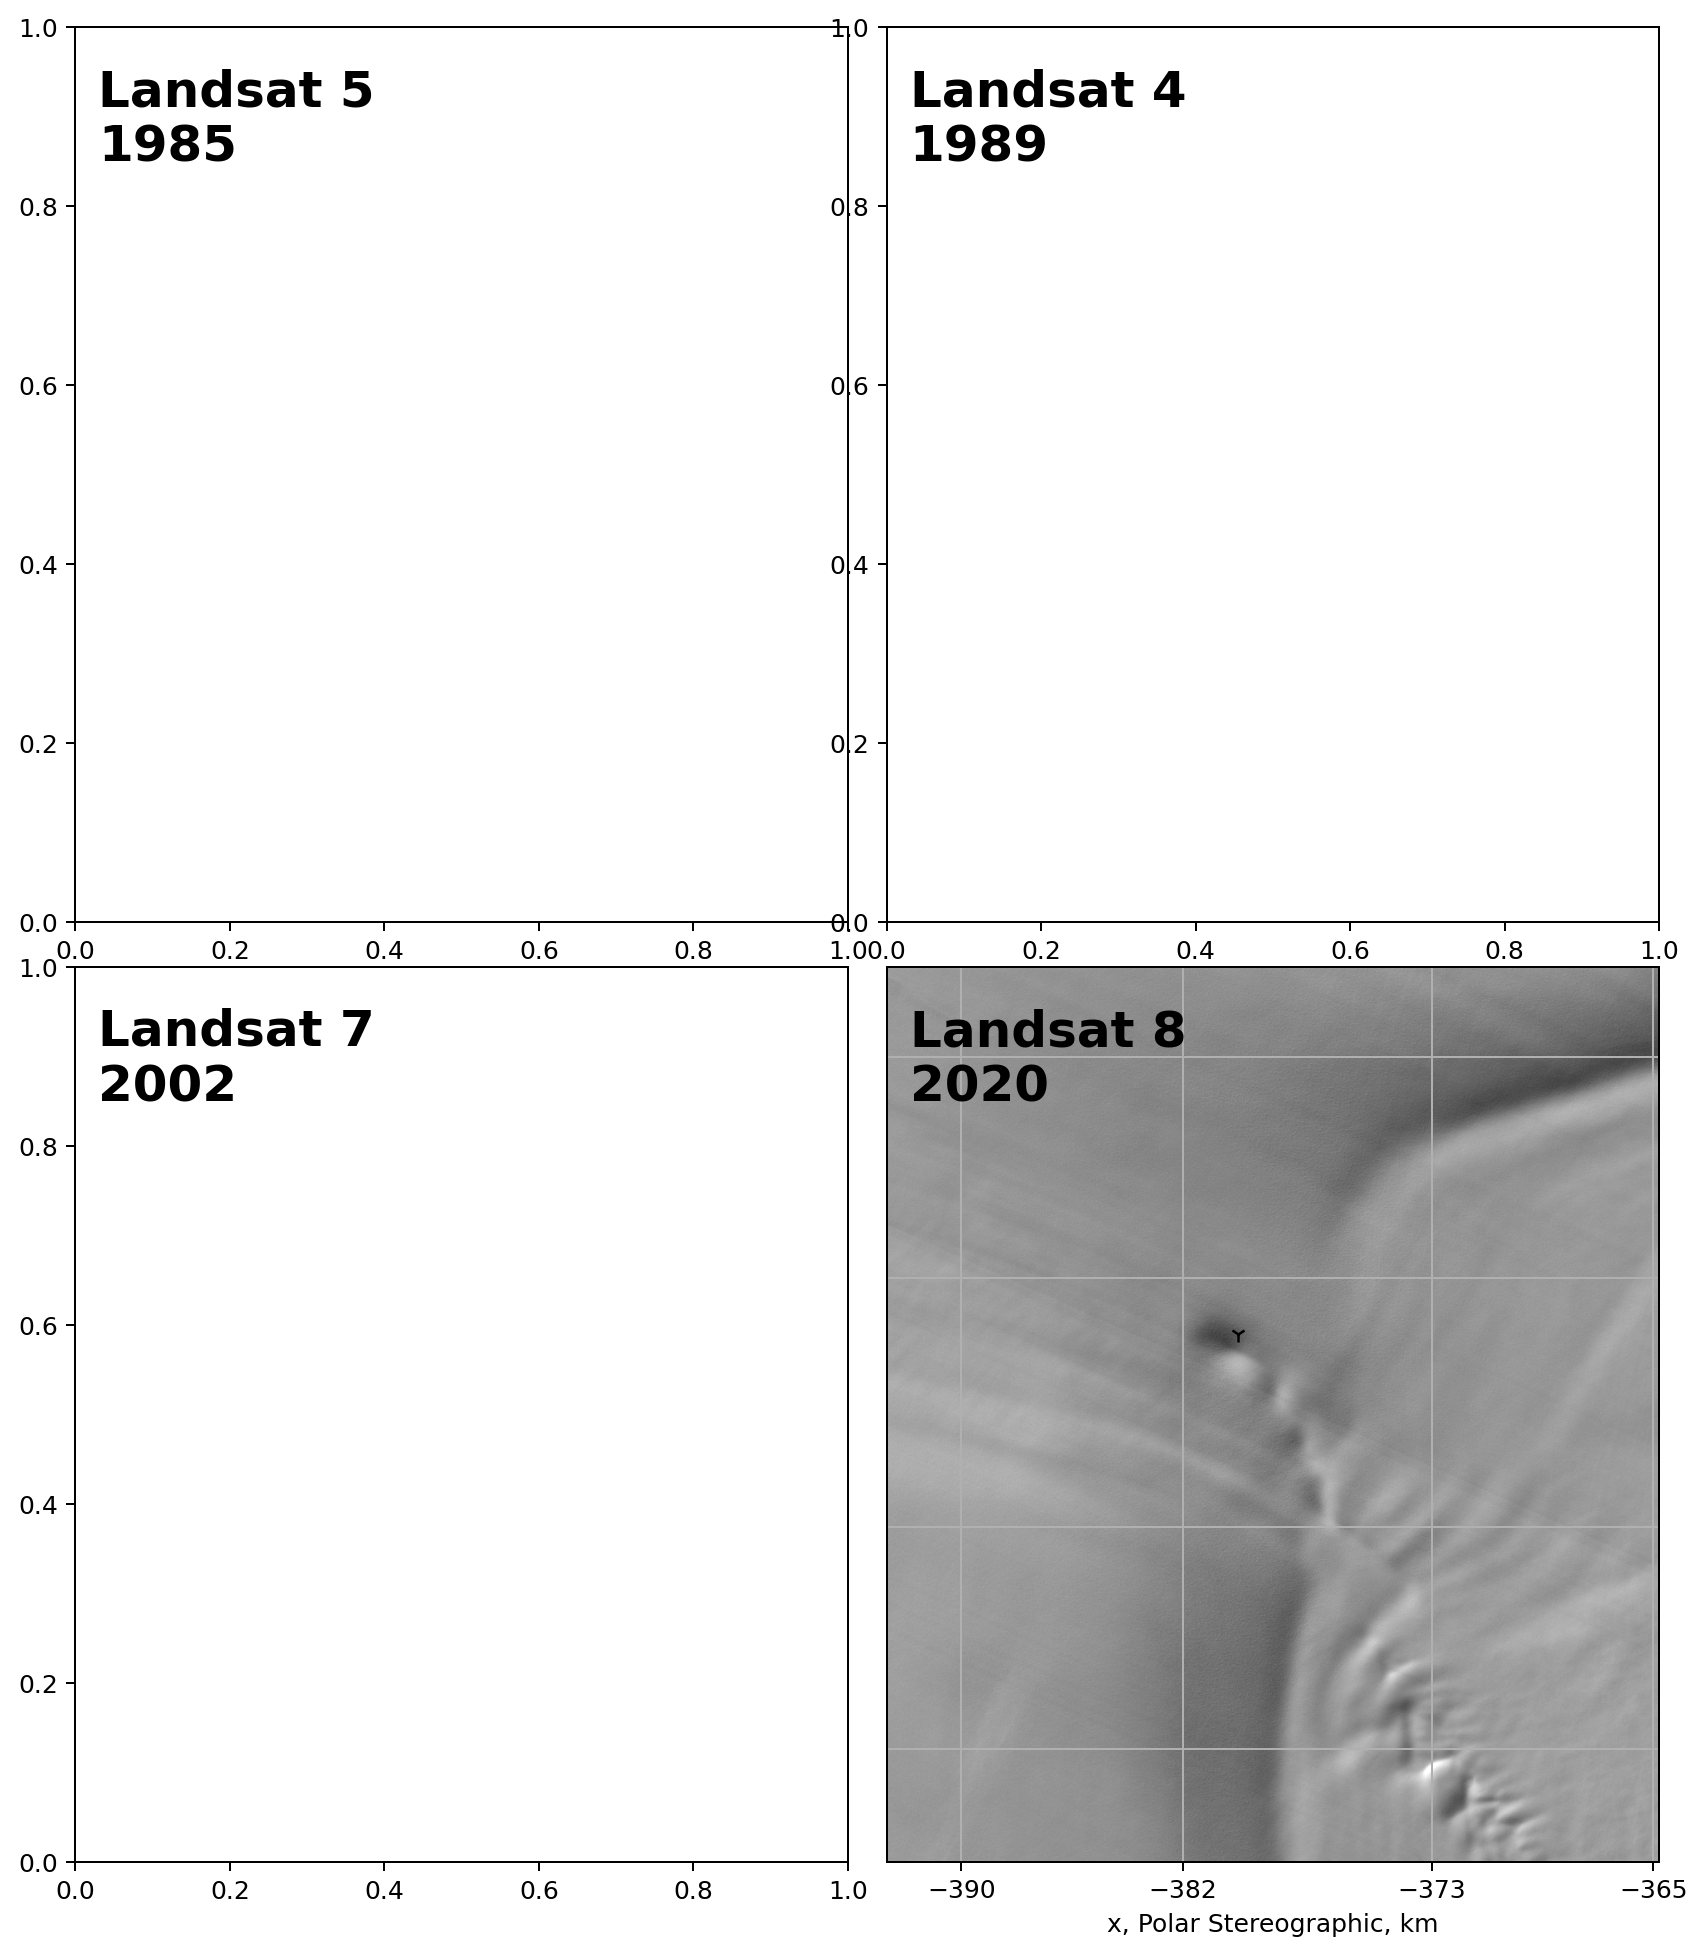

In [17]:
fig, ax = plt.subplots(2,2, dpi=180,figsize=(11,13.5))
plt.subplots_adjust(wspace=0.05, hspace=0.05, right=0.9, left=0.1)

aa = ax[1,1].imshow(im_20,extent=np.array(extent_20)/1000, vmin=38000,vmax=43000, cmap='gist_gray')
ax[1,1].grid()
ax[1,1].set_xlim([xmin,xmax])
ax[1,1].set_ylim([ymin,ymax])
ax[1,1].tick_params(left=False, labelleft=False)
ax[1,1].set_yticks(yticks)
ax[1,1].set_xlabel('x, Polar Stereographic, km')
ax[1,1].set_xticks(xticks)
ax[1,1].plot(-380,-725,'1k')


# # fig.colorbar(aa,ax=ax[1,1])


# a1 = ax[1,0].imshow(im_02,extent=np.array(extent_02)/1000,vmin=115,vmax=130, cmap='gist_gray')
# ax[1,0].grid()
# ax[1,0].set_xlim([xmin,xmax])
# ax[1,0].set_ylim([ymin,ymax])
# ax[1,0].set_ylabel('y, Polar Stereographic, km')
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_xticks(xticks)
# ax[1,0].set_xlabel('x, Polar Stereographic, km')
# # ax[1,0].tick_params(labelrotation=45)

# # fig.colorbar(a1,ax=ax[1,0])

# a2 = ax[0,1].imshow(im_89,extent=np.array(extent_89)/1000,vmin=115,vmax=135, cmap='gist_gray')
# ax[0,1].grid()
# ax[0,1].set_xlim([xmin,xmax])
# ax[0,1].set_ylim([ymin,ymax])
# ax[0,1].tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
# ax[0,1].set_yticks(yticks)
# ax[0,1].set_xticks(xticks)

# # fig.colorbar(a2,ax=ax[1,0])

# a3 = ax[0,0].imshow(im_85,extent=np.array(extent_85)/1000,vmin=175,vmax=190, cmap='gist_gray')
# ax[0,0].grid()
# ax[0,0].set_xlim([xmin,xmax])
# ax[0,0].set_ylim([ymin,ymax])
# ax[0,0].tick_params(bottom=False, labelbottom=False)
# ax[0,0].set_xticks(xticks)
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_ylabel('y, Polar Stereographic, km')


# ax[0,0].set_yticks(yticks)


# fig.colorbar(a3,ax=ax[1,1])

axs = ax.flat

titles = ['Landsat 5\n1985','Landsat 4\n1989','Landsat 7\n2002','Landsat 8\n2020']

for n, a in enumerate(axs):
#     a.text(0, 1.05, titles[n], transform=a.transAxes, 
     a.text(0.03, 0.85, titles[n], transform=a.transAxes, 
            size=20, weight='bold')

# plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/historic_channel.png')
plt.show()